# Brain Tumor Detection Using CNN

### Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
import datetime
import random
import scipy
import time
import glob
import cv2

In [2]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU is available')
else:
    print("GPU is not available")

GPU is available


### Preprocessing

In [3]:
path_no = "A:/DL/Brain-tummer-detection/db/no/*"
path_yes = "A:/DL/Brain-tummer-detection/db/yes/*"

In [4]:
tumor = []
notumor = []


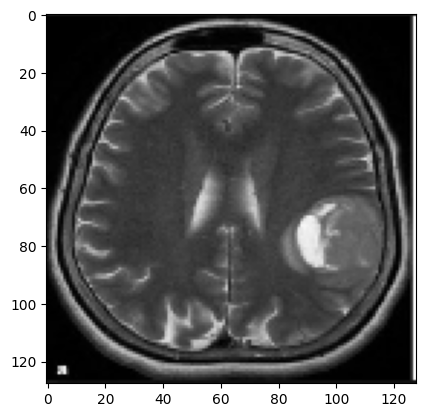

In [5]:
for file in glob.iglob(path_yes):
    img = cv2.imread(file)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img = cv2.resize(img ,(128 , 128))
    plt.imshow(img)
    tumor.append((img,1))

In [6]:
tumor

[(array([[[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [2, 2, 2],
          [2, 2, 2],
          [2, 2, 2]],
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [2, 2, 2],
          [2, 2, 2],
          [2, 2, 2]],
  
         [[3, 3, 3],
          [3, 3, 3],
          [3, 3, 3],
          ...,
          [2, 2, 2],
          [2, 2, 2],
          [2, 2, 2]],
  
         ...,
  
         [[2, 2, 2],
          [2, 2, 2],
          [2, 2, 2],
          ...,
          [2, 2, 2],
          [2, 2, 2],
          [3, 3, 3]],
  
         [[2, 2, 2],
          [2, 2, 2],
          [2, 2, 2],
          ...,
          [2, 2, 2],
          [2, 2, 2],
          [3, 3, 3]],
  
         [[2, 2, 2],
          [2, 2, 2],
          [2, 2, 2],
          ...,
          [1, 1, 1],
          [1, 1, 1],
          [2, 2, 2]]], dtype=uint8),
  1),
 (array([[[255, 255, 255],
          [251, 251, 251],
          [248, 248, 248],
          ...,

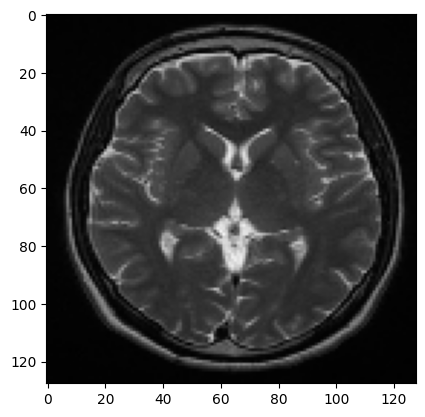

In [7]:
for file in glob.iglob(path_no):
    img = cv2.imread(file)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img = cv2.resize(img ,(128 , 128))
    plt.imshow(img)
    notumor.append((img,0))

In [8]:
all_data = tumor + notumor

In [9]:
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

In [10]:
data.shape

(253, 128, 128, 3)

In [11]:
labels.shape

(253,)

Text(0.5, 0, '62')

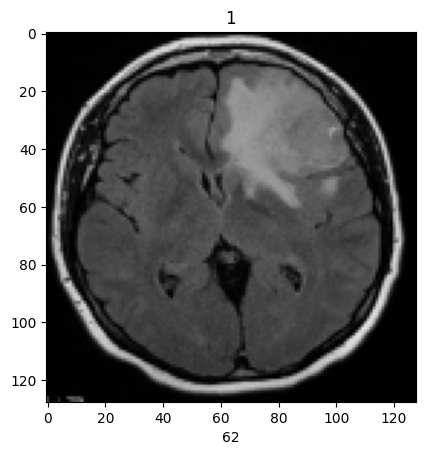

In [12]:
i=np.random.randint(253)
plt.imshow(data[i])
plt.title(f"{labels[i]}")
plt.xlabel(f"{i}")

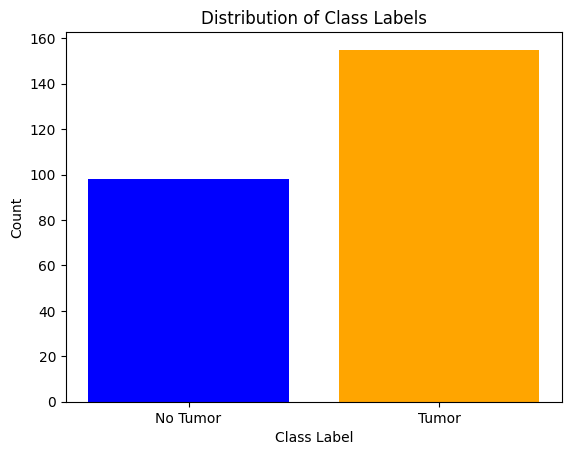

In [13]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'orange'])
plt.xticks(unique_labels, ['No Tumor', 'Tumor'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.show()

In [14]:
random.shuffle(all_data)

In [15]:
X = np.array([item[0] for item in all_data])
y = np.array([item[1] for item in all_data])

In [16]:
X =X /255.0

In [17]:
print("Minimum value of the scaled data:", X.min())
print("Maximum value of the scaled data:",  X.max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


### Neural Network Layers & Training

In [18]:
model = tf.keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir="logs/")

In [21]:
class moniter_accuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            
moniter = moniter_accuracy()

In [22]:
hist = model.fit(X, y,epochs=40,batch_size=32,validation_split=0.2,callbacks=[moniter,tensorboard])

Epoch 1/40
7/7 [==============================] - 7s 77ms/step - loss: 0.6239 - accuracy: 0.6436 - val_loss: 0.4134 - val_accuracy: 0.8431
Epoch 2/40
7/7 [==============================] - 0s 22ms/step - loss: 0.5457 - accuracy: 0.7327 - val_loss: 0.4842 - val_accuracy: 0.8235
Epoch 3/40
7/7 [==============================] - 0s 22ms/step - loss: 0.5243 - accuracy: 0.7723 - val_loss: 0.5289 - val_accuracy: 0.7451
Epoch 4/40
7/7 [==============================] - 0s 22ms/step - loss: 0.5481 - accuracy: 0.7327 - val_loss: 0.4767 - val_accuracy: 0.8235
Epoch 5/40
7/7 [==============================] - 0s 22ms/step - loss: 0.4608 - accuracy: 0.8069 - val_loss: 0.4861 - val_accuracy: 0.8431
Epoch 6/40
7/7 [==============================] - 0s 23ms/step - loss: 0.4436 - accuracy: 0.8267 - val_loss: 0.4204 - val_accuracy: 0.8235
Epoch 7/40
7/7 [==============================] - 0s 22ms/step - loss: 0.4097 - accuracy: 0.8168 - val_loss: 0.3982 - val_accuracy: 0.8235
Epoch 8/40
7/7 [===========

In [33]:
model.save("brain_tumor.h5")

### Testing trained Model

In [50]:
def predict_and_display(image_path):
    class_labels = ['tumor', 'no tumor']
    model = tf.keras.models.load_model('brain_tumor.h5')
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None
    
    resized_image = cv2.resize(image, (128, 128))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    resized_image = resized_image.astype('float32') / 255.0
    resized_image = np.expand_dims(resized_image, axis=0)
    
    predictions = model.predict(resized_image)
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_class_index]
    
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()



1/1 [==============================] - 0s 66ms/step


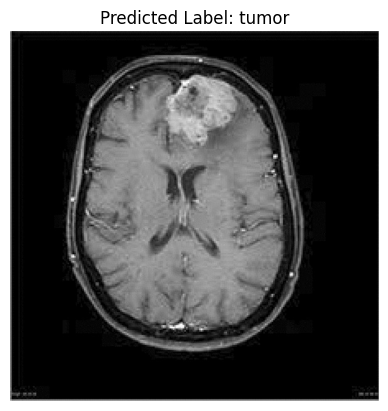

In [55]:
predict_and_display('2.jpg')

1/1 [==============================] - 0s 67ms/step


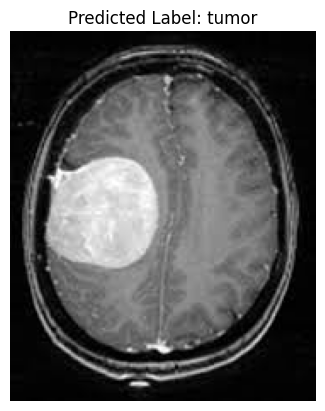

In [51]:
predict_and_display('Y1.jpg')